## Exercicio 4 
Ana Moreira \
Damião Goes

In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import normaltest

In [53]:
df = pd.read_csv(r'C:\Users\Damião\Desktop\Isa\Mestrado\2_semestre\Avdcaa\greends-avcad-2024\greends-avcad-2024\examples\EFIplus_medit.zip', compression='zip', sep=";")

In [54]:
# clear de NaN values from the dataset
df2 = df.dropna()

In [55]:
df2['Salmo_trutta_fario_presence'] = df2['Salmo trutta fario'] > 0
df2.drop(df2.iloc[:,5:15], axis=1, inplace=True)


C:\Users\Damião\AppData\Local\Temp\ipykernel_19288\985786951.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Salmo_trutta_fario_presence'] = df2['Salmo trutta fario'] > 0
C:\Users\Damião\AppData\Local\Temp\ipykernel_19288\985786951.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.drop(df2.iloc[:,5:15], axis=1, inplace=True)


#### 4.1

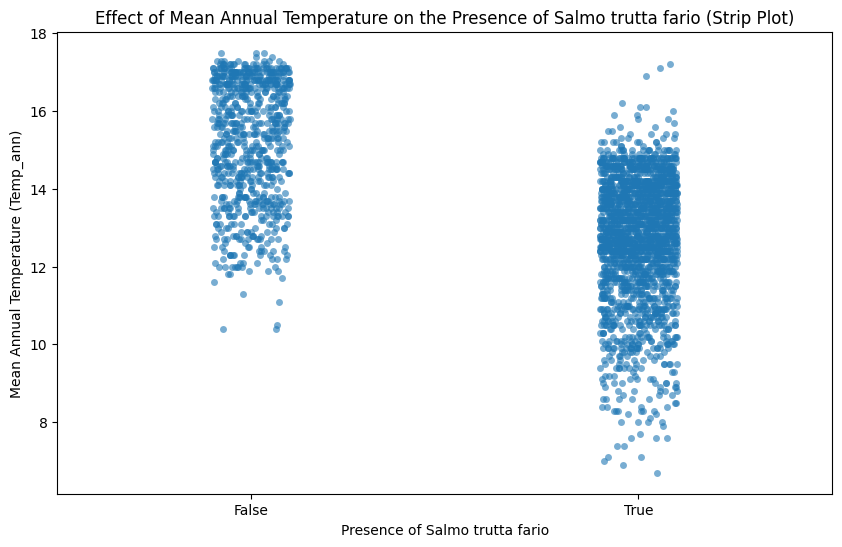

In [56]:
plt.figure(figsize=(10, 6))
sns.stripplot(x='Salmo_trutta_fario_presence', y='temp_ann', data=df2, jitter=True, alpha=0.6)
plt.xlabel('Presence of Salmo trutta fario')
plt.ylabel('Mean Annual Temperature (Temp_ann)')
plt.title('Effect of Mean Annual Temperature on the Presence of Salmo trutta fario (Strip Plot)')
plt.show()

#### 4.2

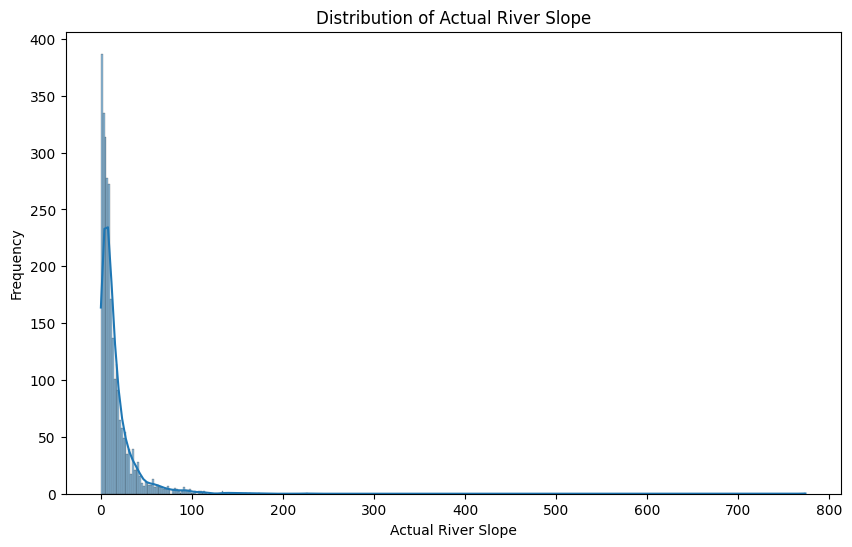

In [57]:

plt.figure(figsize=(10, 6))
sns.histplot(df2['Actual_river_slope'], kde=True)
plt.xlabel('Actual River Slope')
plt.ylabel('Frequency')
plt.title('Distribution of Actual River Slope')
plt.show()

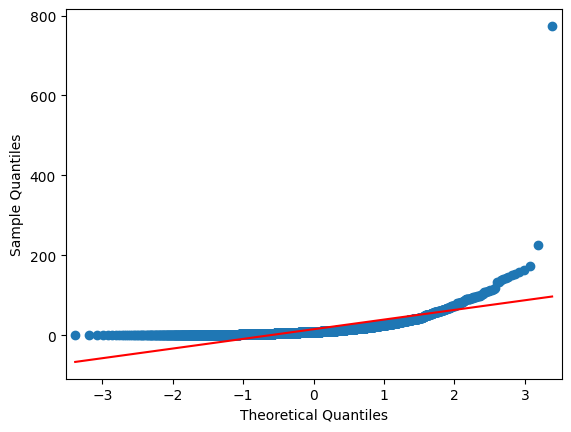

In [58]:
from statsmodels.graphics.gofplots import qqplot

qqplot(pd.Series(df2['Actual_river_slope']), line='s')
plt.show()

In [59]:
# Hypothesis testing
stat, p_value = normaltest(df2['Actual_river_slope'].dropna())
print(f"Normality test for Actual River Slope: Statistic={stat}, p-value={p_value}")
# normality test

print('Statistics=%.3f, p=%.3f' % (stat, p_value)) 

alpha = 0.05
if p_value > alpha:
 print('Sample is not significantly different from Gaussian (fail to reject H0. Rejecting H0 has an error probability >0.05)')
else:
 print('Sample is significantly different from Gaussian (reject H0 with an error probability <0.05)')

Normality test for Actual River Slope: Statistic=5134.257853683186, p-value=0.0
Statistics=5134.258, p=0.000
Sample is significantly different from Gaussian (reject H0 with an error probability <0.05)


#### 4.3

In [60]:
n_samples = 100
sample_size = 2000
means = []
for _ in range(n_samples):
    sample = df2['Actual_river_slope'].dropna().sample(n=sample_size, replace=True)
    means.append(sample.mean())

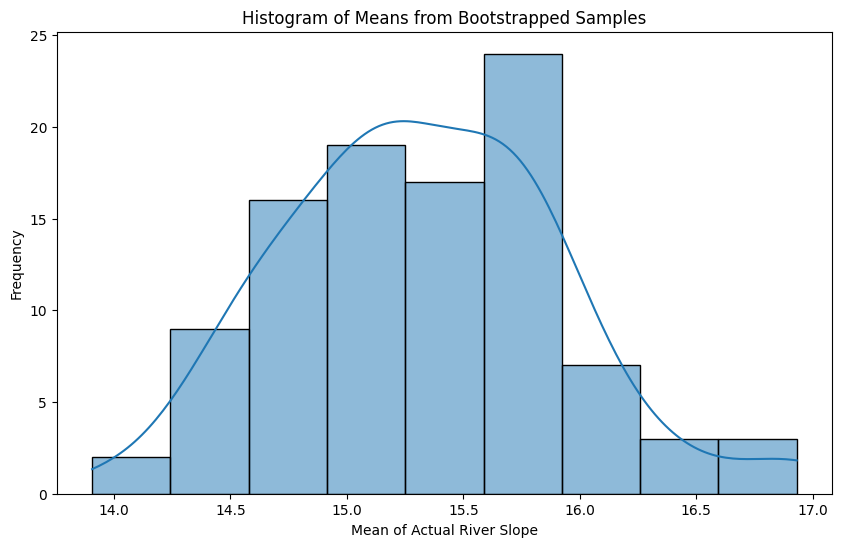

In [61]:
plt.figure(figsize=(10, 6))
sns.histplot(means, kde=True)
plt.xlabel('Mean of Actual River Slope')
plt.ylabel('Frequency')
plt.title('Histogram of Means from Bootstrapped Samples')
plt.show()

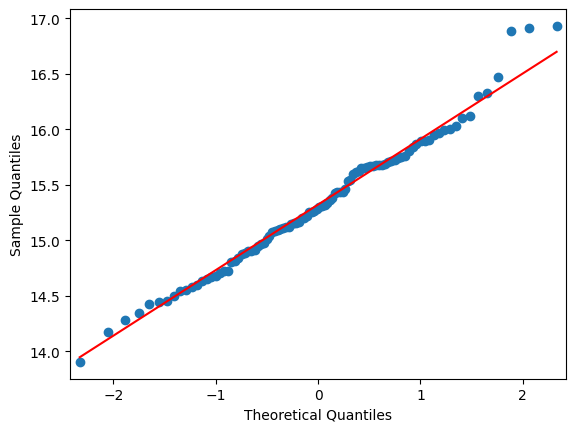

In [62]:
qqplot(pd.Series(means), line='s')
plt.show()

In [63]:
from scipy.stats import shapiro

stat_means, p_value_means = shapiro(means)
print(f"Shapiro-Wilk test for Bootstrapped Means: Statistic={stat_means}, p-value={p_value_means}")
alpha = 0.05
if p_value_means > alpha:
    print('H0 is not rejected (Rejecting H0 has an error probability >0.05)')
else:
    print('reject H0 (Rejecting H0 has an error probability <0.05)')


Shapiro-Wilk test for Bootstrapped Means: Statistic=0.9854152593523945, p-value=0.3401102127399388
H0 is not rejected (Rejecting H0 has an error probability >0.05)
